<a href="https://colab.research.google.com/github/shashwatsaket46/study/blob/main/demo_auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression for Automobile mpg Data

In this demo, you will see how to:
* Load data from a text fileausing the `pandas` package
* Create a scatter plot of data
* Handle missing data
* Fit a simple linear model
* Plot the linear fit with the test data
* Use a nonlinear transformation for an improved fit

## Acknowledgement

This demo is imported from prof. Christopher Musco's 2024 iteration of CS-GY 6923. Thanks Chris!

## Loading the Data

The python [`pandas`](http://pandas.pydata.org/) library is a package for data analysis.  In this course, we will use a small portion of its features -- just reading and writing data from files.  After reading the data, we will convert it to `numpy` for all numerical processing including running machine learning algorithms.

We begin by loading the packages.

In [2]:
import pandas as pd
import numpy as np

The data for this demo comes from a survey of cars to determine the relation of mpg to engine characteristics.  The data can be found in the UCI library: https://archive.ics.uci.edu/ml/datasets/auto+mpg. The specific files we need are in the "Data Folder" there: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg.

### Try 1:  Loading the Data Incorrectly

The pandas has very good methods for loading data from ASCII tables. In this case, we want to read the data in the file:
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

Since the file is a CSV file (comma-separated-values), we can try to use the `read_csv` command:

This creates a pandas *dataframe*. We can see the first six lines of the dataframe with `head` command:

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

# you can also upload a data file to you Colab notebook using the menu on the left of the page. Then read locally:
# df = pd.read_csv('auto-mpg.data')

There were three errors:
* All the data appeared in one column.  That is, the columns were not "delimited" correctly
* The first line got mistook as a header
* The columns are missing their header names

In [6]:
df.head(5)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


### Try 2: Fixing the Errors in the loading

The problems above are common.  Often it takes a few times to load the data correctly.  That is why it is
good to look at the first few elements of the dataframe before proceeding.
After some googling you can find out that you need to specify some other options to the `read_csv` command.
First, you need to supply the names of the columns.  In this case, we have supplied them manually based on the
description in the UCI website:

In [7]:
names = ['mpg', 'cylinders','displacement', 'horsepower',
         'weight', 'acceleration', 'model year', 'origin', 'car name']

Then, we can repeat the `read_csv` command with the correct options.

In [8]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

/tmp/ipython-input-2255732929.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',


If you re-run `head` command now, you can see the loading was correct. You can see the column names, index, and values:

## Manipulating the Data
We can get the `shape` of the data, which indicates the number of samples and number of attributes

You can also see the three components of the `dataframe` object.  The dataframe is stored in a table (similar to a SQL table if you know databases).  In this case, there is one row for each car and the attributes of the car are stored in the columns.  The command `df.columns` returns the names of the columns.

In [9]:
df.head(6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [10]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

The field `df.index` returns the indices of the rows.  In this case, they are just enumerated 0,1,...

In [11]:
df.index

RangeIndex(start=0, stop=398, step=1)

Finally, `df.values` is a 2D `numpy` array with values of the attributes for each car.  Note that the data can be *heterogeneous*:  Some entries are integers, some are floating point values and some are strings.

In [12]:
df.values

array([[18.0, 8, 307.0, ..., 70, 1, 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 1, 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 1, 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 1, 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 1, 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 1, 'chevy s-10']], dtype=object)

The `df.columns` attribute is not a python list, but a `pandas`-specific data structure called an `Index`.  To convert to a list, use the `tolist()` method:

In [13]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

You can select subsets of the attributes with indexing.  For example, this selects one attribute, which returns what is called a pandas `Series`

In [14]:
df2 = df['cylinders']
df2.head(6)

,cylinders
0,8
1,8
2,8
3,8
4,8
5,8


You can also select a list of column names which returns another dataframe.  Note the use of the double brackets `[[ ... ]]`.

In [15]:
df2 = df[['cylinders','horsepower']]
df2.head(6)

,cylinders,horsepower
0,8,130.0
1,8,165.0
2,8,150.0
3,8,150.0
4,8,140.0
5,8,198.0


## Plotting the Data
We load the `matplotlib` module to plot the data.

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

First, we need to convert the dataframes to numpy arrays:

In [17]:
x = df['displacement'].values
y = df['mpg'].values

Then, we can create a scatter plot

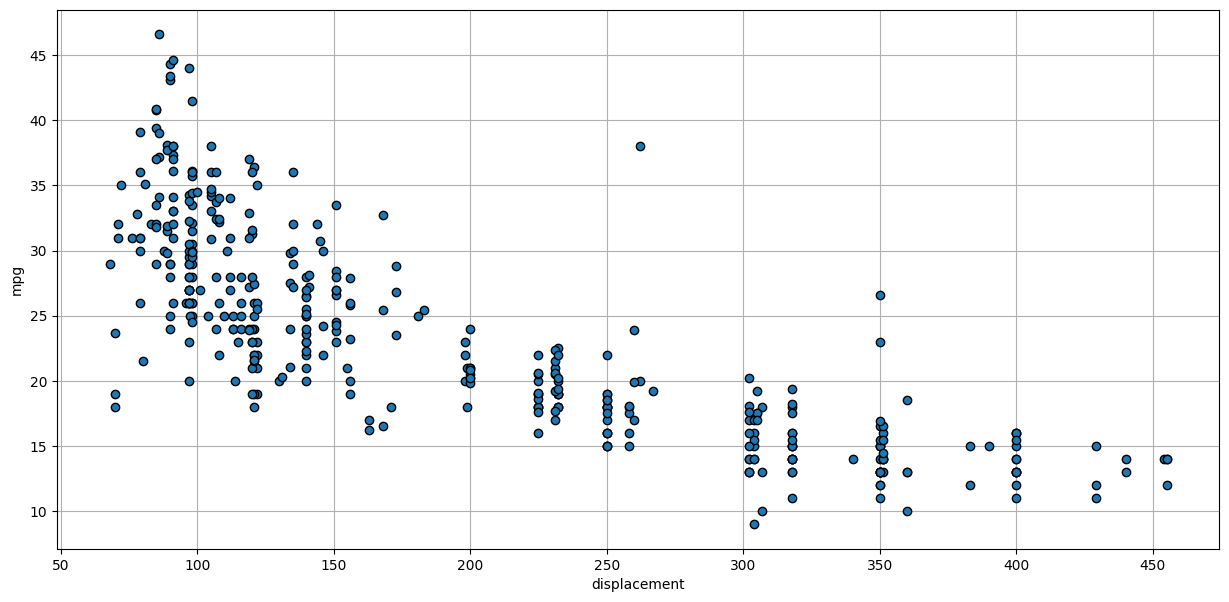

In [18]:
plt.figure(figsize=(15,7))
plt.plot(x,y,'o', mec="k")
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.grid(True)

## Manipulating Numpy arrays

Once the data is converted to a numpy array, we can perform many useful simple calculations.  For example, we can compute the sample mean:

In [19]:
mx = np.mean(x)
my = np.mean(y)
print('Mean displacement = {0:5.1f}, mean mpg= {1:5.1f}'.format(mx, my))

Mean displacement = 193.4, mean mpg=  23.5


Fraction of cars with > 25 mpg:

In [20]:
np.mean(y > 25)

np.float64(0.3969849246231156)

Sample mean displacement for the cars that have mpg > 25

In [21]:
I = (y>25)
I

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
np.sum(x*I)/np.sum(I)

np.float64(110.08227848101266)

You can also do the previous command with [boolean indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html).

In [23]:
np.mean(x[I])

np.float64(110.08227848101266)

## Missing Data and NaN Values

Now, try a different field, horsepower

In [24]:
x = np.array(df['horsepower'])
y = np.array(df['mpg'])
np.mean(x)

np.float64(nan)

When you get the mean, it gives `nan` which means not a number.  The reason is that there was missing data in the orginal file and the `load_csv` function put `nan` values in the places where the data was missing.  This is very common.  To remove the rows with the missing data, we can use the `dropna` method:

In [25]:
df1 = df[['mpg','horsepower']]
df2 = df1.dropna()
print(str(df1.shape))
print(str(df2.shape))

(398, 2)
(392, 2)


We can see that some of the rows have been dropped.  Specifically, the number of samples went from 398 to 392.  We can now compute the mean using the reduced dataframe.

In [26]:
x = df2['horsepower'].values
y = df2['mpg'].values
np.mean(x)

np.float64(104.46938775510205)

In [50]:
valueOfLambda = 100
xMinusLambda = np.maximum(0,x - valueOfLambda)
X =np.column_stack([np.ones_like(x), x, xMinusLambda])
lrModelMPGHorsePower = LinearRegression(fit_intercept=False)
lrModelMPGHorsePower.fit(X,y)
betaHat = lrModelMPGHorsePower.coef_
betaHat


array([53.57724087, -0.32638817,  0.234966  ])

In [52]:
a1,s1,delta = betaHat
s2 =s1+delta
print(f'a1: {a1}, s1: {s1}, s2: {s2}')

a1: 53.57724087172671, s1: -0.3263881725395748, s2: -0.09142217282311599


In [58]:
def predictionFunctionUsingA1S1S2(x):
  return a1+s1*x + (np.maximum(0,x-valueOfLambda)) *delta

In [59]:
xPlot = np.linspace(x.min(), x.max(), 200)
yPlot = predictionFunctionUsingA1S1S2(xPlot)

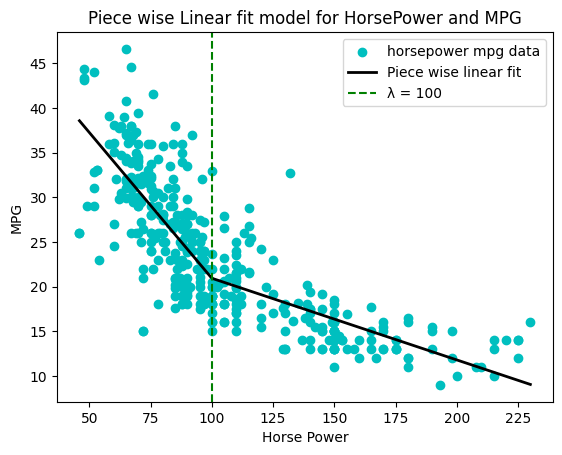

In [73]:
plt.scatter(x,y, color='c', label = 'horsepower mpg data')
plt.plot(xPlot,yPlot, color='k',linewidth ='2',label='Piece wise linear fit')
plt.axvline(valueOfLambda, color="green", linestyle="--", label=f"λ = {valueOfLambda}")
plt.legend()
plt.xlabel('Horse Power')
plt.ylabel("MPG")
plt.title("Piece wise Linear fit model for HorsePower and MPG")
plt.show()

And, we can plot the data.